## NERD DOS DADOS - PREVISÃO DO SCORE DE CRÉDITO COM REGRESSÃO LINEAR
### Vamos criar um modelo predito de machine learning para prever o score de crédito do cliente
<p> Um resumo do que veremos aqui:<br>
    - Analise Exploratória e Gráficos<br>
    - Tratamento de dados missing <br>
    - Tratamento de outliers <br>
    - OneHotEncoding <br>
    - Engenharia de Atributos <br>
    - Tratamento de dados <br>
    - Normalização de dados <br>
    - Criação, teste e validação de um modelo de machine learning

In [844]:
# A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.
# Obs.: Pacotes do Python são conjuntos de funcionalidades disponíveis da ferramenta.

#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Numpy: Possui uma série de funções e comandos para trabalharmos com números de forma em geral(formatação, calculos, etc)
import numpy as np

#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo


#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importação dos dados, Analise Exploratória e Tratamento de Dados

In [845]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df_dados = pd.read_excel("dados_credito.xlsx")

In [846]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
#Colunas também são chamadas de variáveis.
df_dados.shape

(10476, 17)

In [847]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [848]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [849]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

# A variavel CODIGO_CLIENTE poderá ser excluída
# As variaveis UF, ESCOLARIDADE, CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO_ATUALMENTE e ESTADO_CIVIL --> OneHotEncoding
# A variavel ULTIMO_SALARIO está como STRING e precisa ser NUMERICA

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [850]:
# Vamos excluir a variavel CODIGO_CLIENTE
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [851]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que há um valor que foi inserido como "SEM DADOS"
df_dados.groupby(['ULTIMO_SALARIO']).size()

,0
ULTIMO_SALARIO,
1800,846
2200,792
3100,792
3900,792
4500,468
4800,792
5300,522
6100,522
6800,611


In [852]:
# Aqui poderíamos resolver de duas formas.

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
#df_dados.drop(df_dados.loc[df_dados['VALOR']=='SEM VALOR'].index, inplace=True)


# A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [853]:
# Agora substituimos a palavra SEM VALOR por um valor NULO
df_dados.replace('SEM DADOS',np.nan, inplace = True)

In [854]:
# Em seguida convertemos o campo em float
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [855]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
# A variavel ULTIMO_SALARIO possui valores NULOS e precisaremos trata-los
df_dados.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [856]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [857]:
# Vamos confirmar se não restaram valores nulos
df_dados.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [858]:
# Vamos avaliar novamente os tipos das variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [859]:
# Vamos avaliar algumas medidas estatisticas básicas
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [860]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
            print(i, ':' , df_dados.dtypes[i])
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [861]:
# Vamos observar a lista de variáveis e avaliar se nestas variáveis temos outliers através de um boxplot
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

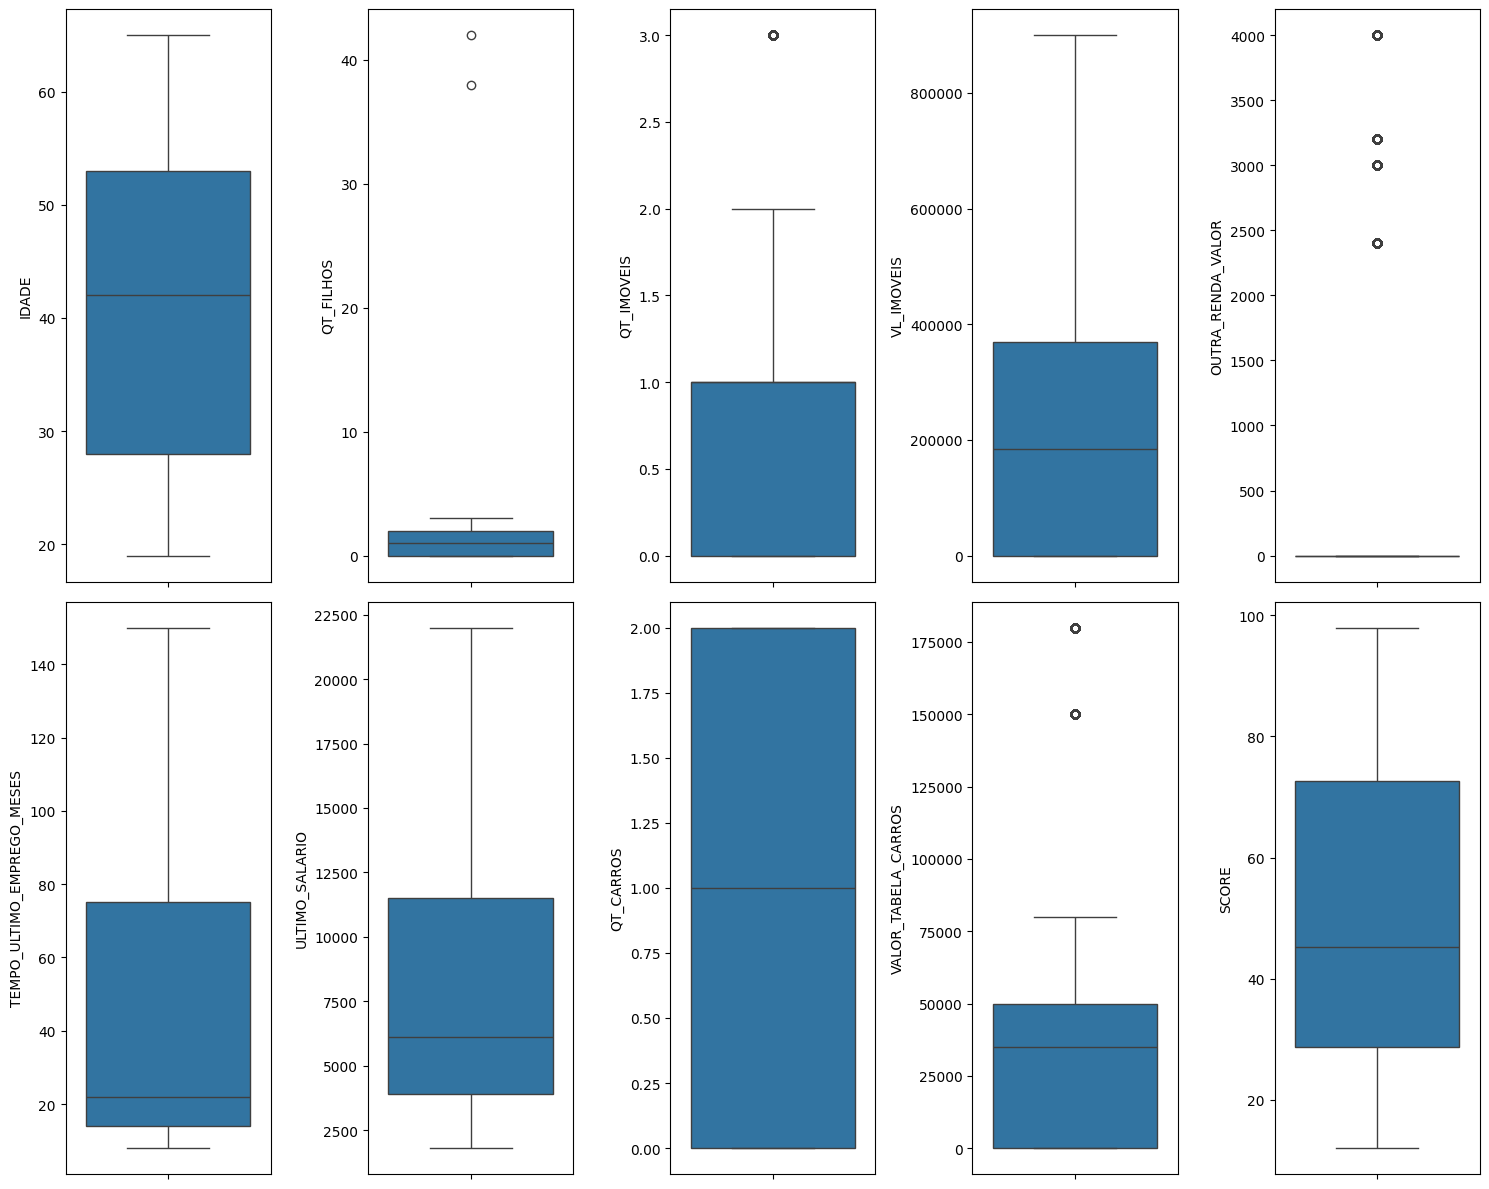

In [862]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0

plt.show()

In [863]:
# Agora já sabemos que temos possíveis OUTLIERS nas variáveis QT_FILHOS, QT_IMOVEIS, VALOR_TABELA_CARROS e OUTRA_RENDA_VALOR
# Vamos olhar quais são esses outliers para avaliar como iremos trata-los.

# Vamos listar a quantidade de filhos superiores a 4
# Como temos somente 2 registros que realmente são outliers então iremos exclui-los
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [864]:
# Nesse exemplo vamos excluir o registro todo.
df_dados.drop(df_dados.loc[df_dados['QT_FILHOS'] > 4].index, inplace=True)

In [865]:
# Vamos avaliar as outras variaveis com possíveis outliers

In [866]:
# Não precisamos alterar nada
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

,0
OUTRA_RENDA_VALOR,
0,8350
2400,468
3000,612
3200,522
4000,522


In [867]:
# Não precisamos alterar nada
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

,0
VALOR_TABELA_CARROS,
0,3762
28000,468
30000,791
35000,792
40000,792
48000,522
50000,1314
70000,521
80000,522


In [868]:
# Não precisamos alterar nada
df_dados.groupby(['QT_IMOVEIS']).size()

,0
QT_IMOVEIS,
0,4680
1,3761
2,989
3,1044


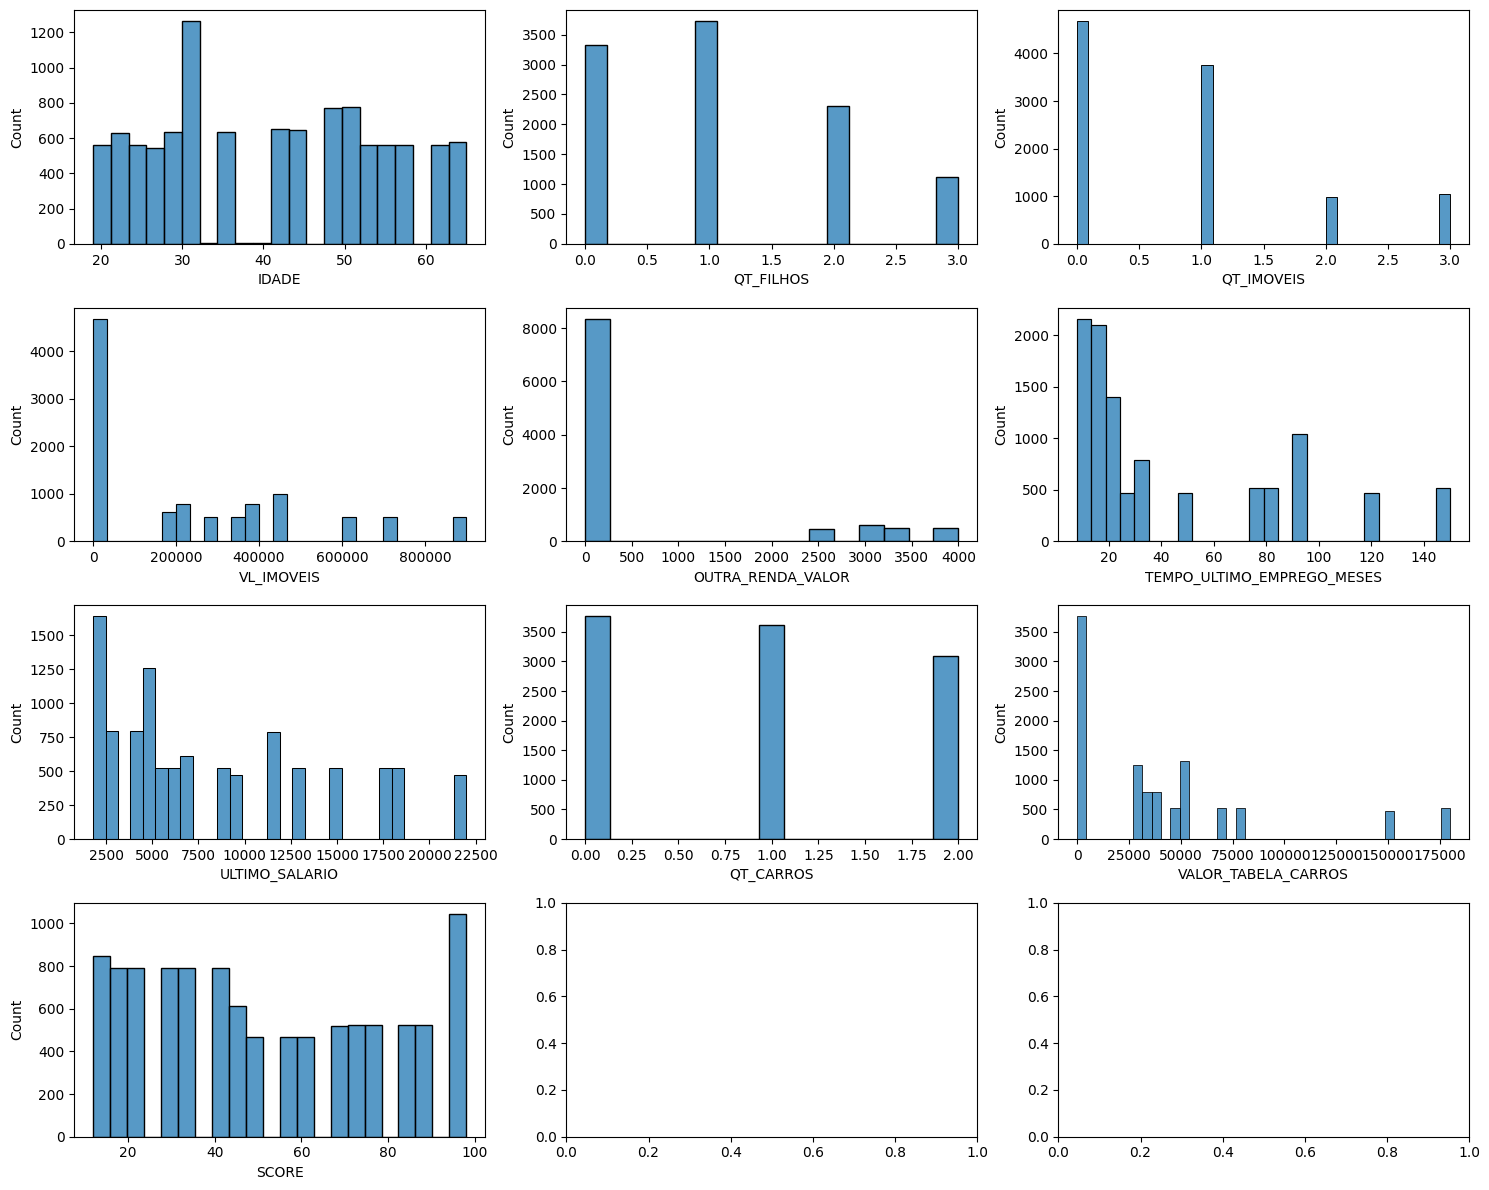

In [869]:
# Vamos gerar um gráfico de histograma para avaliar a distribuição dos dados
# Podemos observar que neste caso os dados estão bem dispersos

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

# Ao tentar gerar uma matriz de correlação, ocorreu erros pois haviam dados do tipo object que deviam ser tratados

In [870]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   UF                          10474 non-null  object  
 1   IDADE                       10474 non-null  int64   
 2   ESCOLARIDADE                10474 non-null  object  
 3   ESTADO_CIVIL                10474 non-null  object  
 4   QT_FILHOS                   10474 non-null  int64   
 5   CASA_PROPRIA                10474 non-null  object  
 6   QT_IMOVEIS                  10474 non-null  int64   
 7   VL_IMOVEIS                  10474 non-null  int64   
 8   OUTRA_RENDA                 10474 non-null  object  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64   
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64   
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object  
 12  ULTIMO_SALARIO              10474 non-null  float64 
 13  QT_CARROS            

In [871]:
dados_categoricas = df_dados
dc = df_dados
dn = df_dados

dn.info()
#print(dados_categoricas)

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  object 
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  object 
 3   ESTADO_CIVIL                10474 non-null  object 
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  object 
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  object 
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object 
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [872]:
# Identifica as colunas do tipo object
dados_categoricas = df_dados.select_dtypes(include=['object', 'category'])

# Remove essas colunas do DataFrame
dn = df_dados.drop(dados_categoricas, axis=1)


# Exibe o DataFrame atualizado
#print(df_dados)
dn.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IDADE                       10474 non-null  int64  
 1   QT_FILHOS                   10474 non-null  int64  
 2   QT_IMOVEIS                  10474 non-null  int64  
 3   VL_IMOVEIS                  10474 non-null  int64  
 4   OUTRA_RENDA_VALOR           10474 non-null  int64  
 5   TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 6   ULTIMO_SALARIO              10474 non-null  float64
 7   QT_CARROS                   10474 non-null  int64  
 8   VALOR_TABELA_CARROS         10474 non-null  int64  
 9   SCORE                       10474 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 900.1 KB


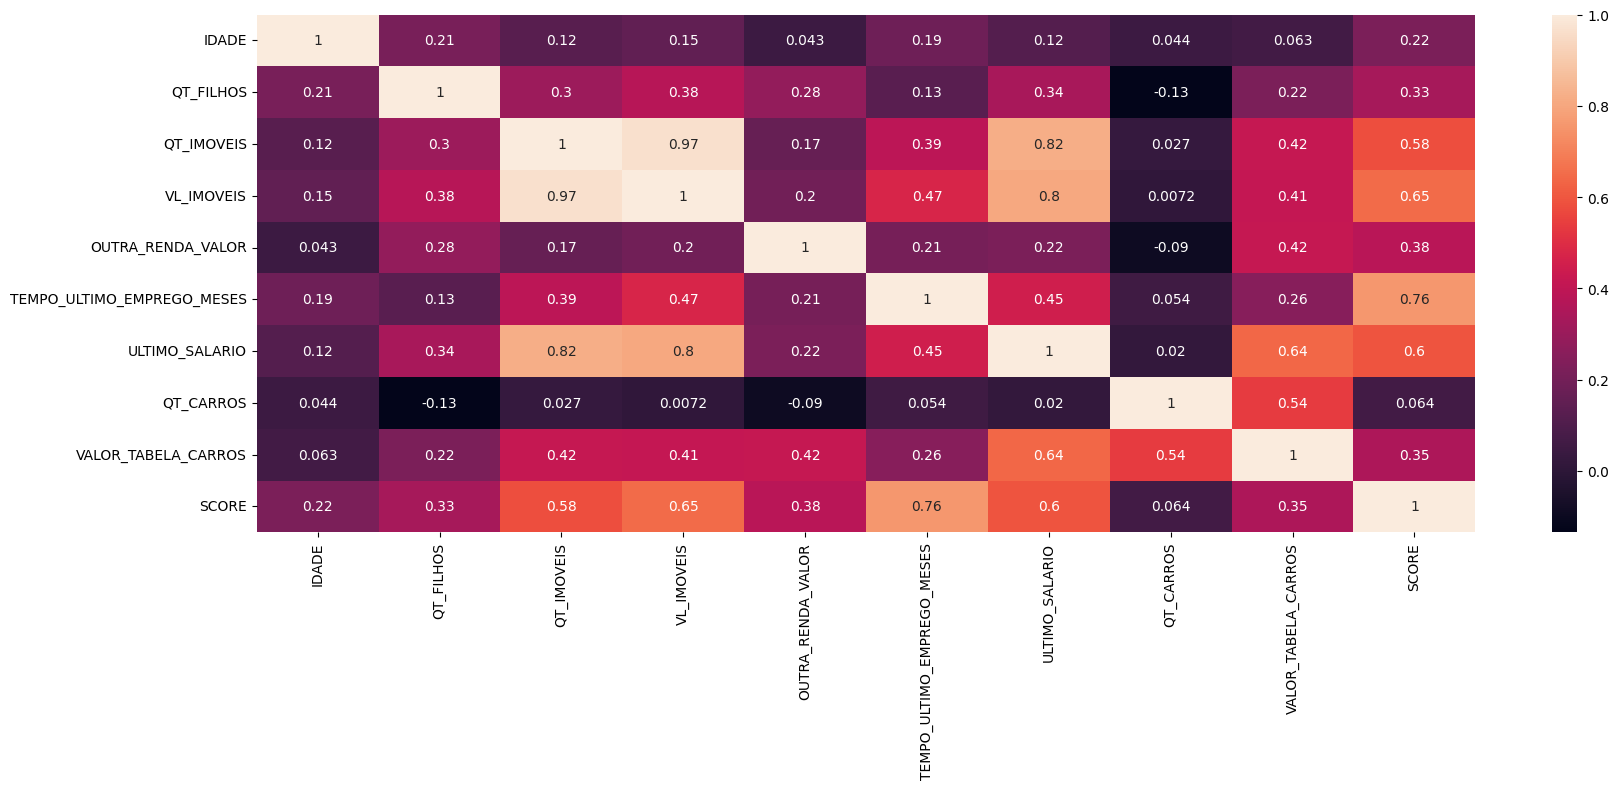

In [873]:
# Através do hitmap podemos observar a correlação entre todas variáveis.
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(dn.corr(), annot=True)


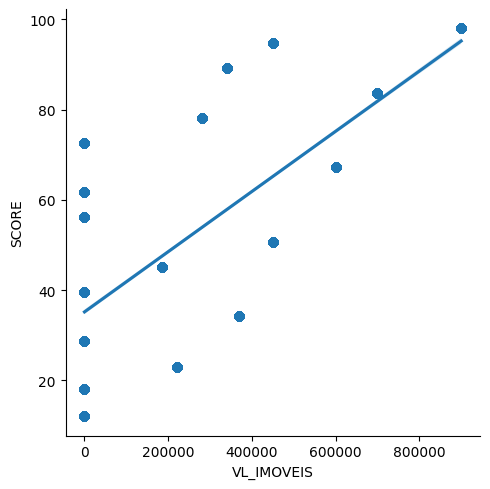

In [874]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = dn);

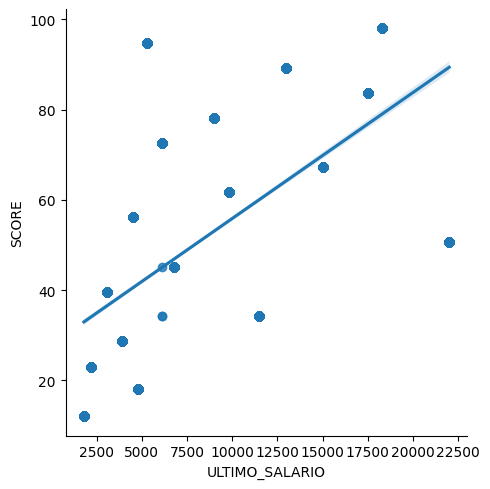

In [875]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = dc);

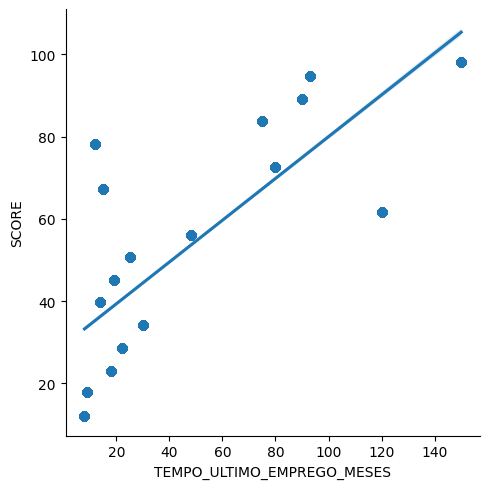

In [876]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = dn);

In [877]:
# Vamos fazer uma engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria
print('Menor Idade: ', dn['IDADE'].min())
print('Maior Idade: ', dn['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


In [878]:
# Engenharia de Atributos - Iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

dc["FAIXA_ETARIA"] = pd.cut(dc["IDADE"], idade_bins, labels=idade_categoria)

dc["FAIXA_ETARIA"].value_counts()

,count
FAIXA_ETARIA,
Até 30,3552
Maior que 50,2448
41 a 50,2070
31 a 40,1270


In [879]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   UF                          10474 non-null  object  
 1   IDADE                       10474 non-null  int64   
 2   ESCOLARIDADE                10474 non-null  object  
 3   ESTADO_CIVIL                10474 non-null  object  
 4   QT_FILHOS                   10474 non-null  int64   
 5   CASA_PROPRIA                10474 non-null  object  
 6   QT_IMOVEIS                  10474 non-null  int64   
 7   VL_IMOVEIS                  10474 non-null  int64   
 8   OUTRA_RENDA                 10474 non-null  object  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64   
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64   
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object  
 12  ULTIMO_SALARIO              10474 non-null  float64 
 13  QT_CARROS            

In [880]:
dc.groupby('FAIXA_ETARIA')["SCORE"].mean()

,SCORE
FAIXA_ETARIA,
Até 30,44.762950
31 a 40,48.883202
41 a 50,51.440177
Maior que 50,56.123775


In [881]:
variaveis_categoricas = []
for i in dc.columns[0:48].tolist():
        if dc.dtypes[i] == 'object' or dc.dtypes[i] == 'category':
            print(i, ':' , dc.dtypes[i])
            variaveis_categoricas.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


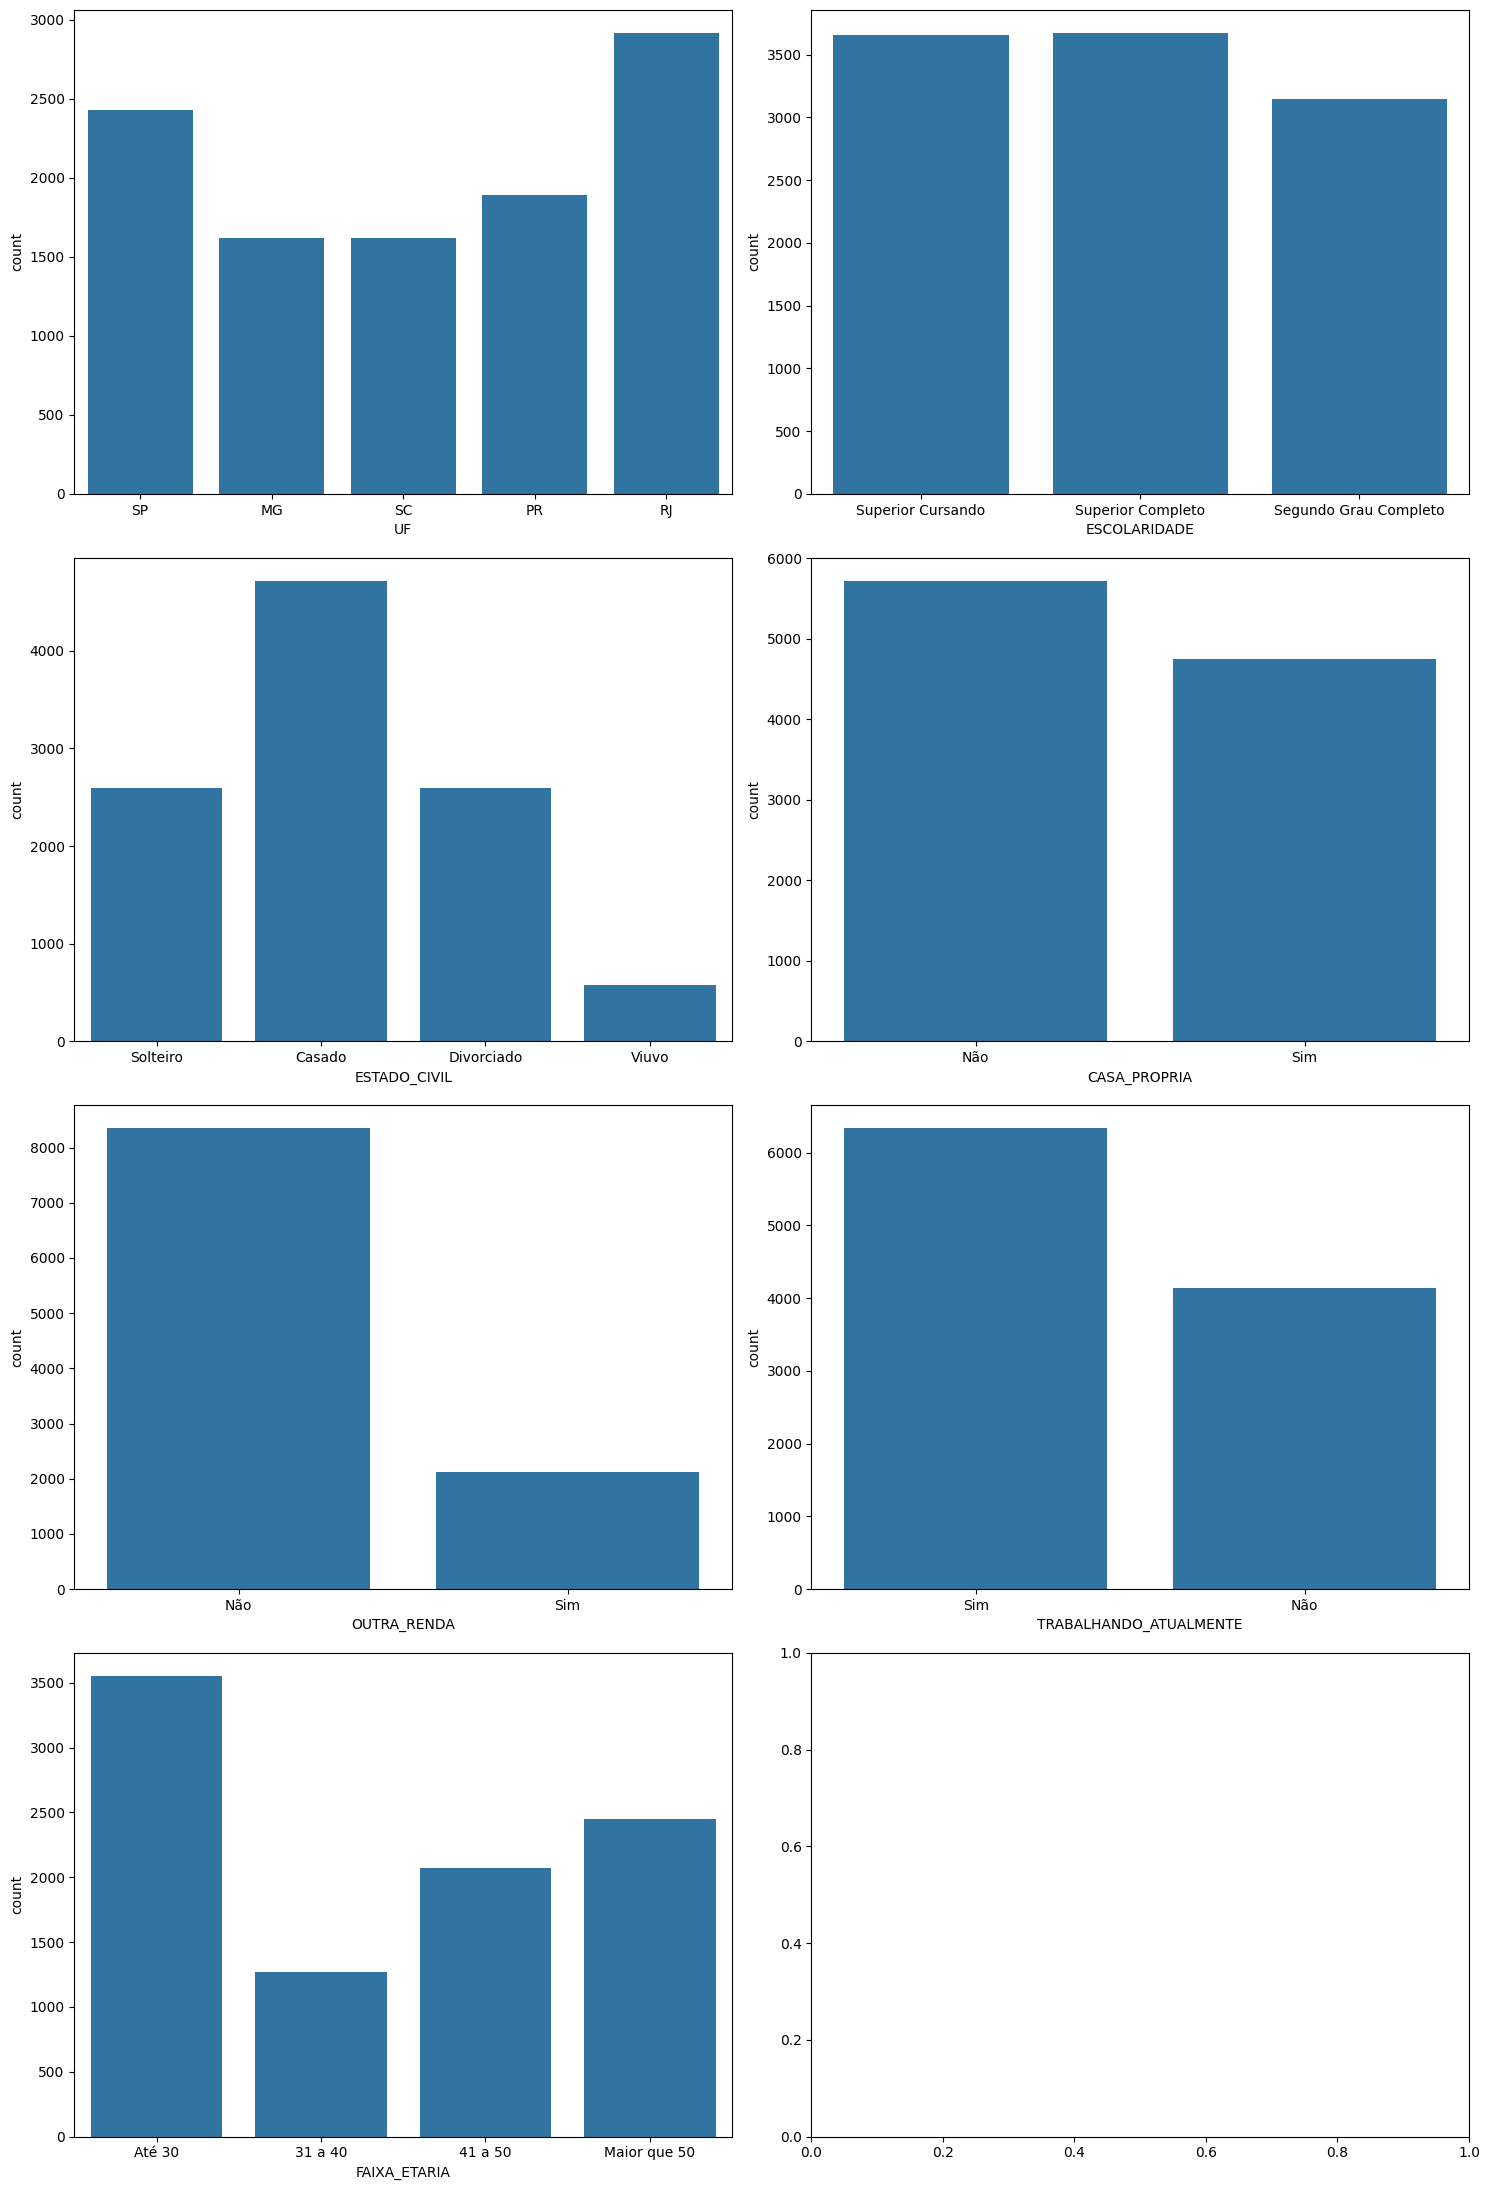

In [882]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data = dc, x=i, ax=axes[linha][coluna])

    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

## Pré Processamento dos Dados

In [883]:
df_dados.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800.0,0,0,12.000000,Até 30
1,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800.0,1,50000,18.000000,Até 30
2,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000,Até 30
3,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900.0,0,0,28.666667,Até 30
4,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,6100.0,1,35000,34.166667,Até 30
5,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100.0,2,40000,39.666667,Até 30
6,MG,32,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,6800.0,0,0,45.166667,31 a 40
7,SC,35,Superior Completo,Solteiro,1,Sim,2,450000,Sim,2400,25,Sim,22000.0,1,150000,50.666667,31 a 40
8,PR,42,Segundo Grau Completo,Casado,0,Não,0,0,Não,0,48,Sim,4500.0,2,28000,56.166667,41 a 50
9,RJ,45,Superior Cursando,Casado,0,Não,0,0,Não,0,120,Não,9800.0,0,0,61.666667,41 a 50


In [884]:
# Agora podemos observar que já temos todas variaveis numericas
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   UF                          10474 non-null  object  
 1   IDADE                       10474 non-null  int64   
 2   ESCOLARIDADE                10474 non-null  object  
 3   ESTADO_CIVIL                10474 non-null  object  
 4   QT_FILHOS                   10474 non-null  int64   
 5   CASA_PROPRIA                10474 non-null  object  
 6   QT_IMOVEIS                  10474 non-null  int64   
 7   VL_IMOVEIS                  10474 non-null  int64   
 8   OUTRA_RENDA                 10474 non-null  object  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64   
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64   
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object  
 12  ULTIMO_SALARIO              10474 non-null  float64 
 13  QT_CARROS            

In [885]:
# Separando a variavel alvo
target = df_dados.iloc[:,15:16]

In [886]:
# Separando as variaveis preditoras

preditoras = df_dados.copy() #Fazendo uma cópia do dataframe

del preditoras['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

preditoras.head()#Visualizando as variaveis preditoras

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800.0,0,0,Até 30
1,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800.0,1,50000,Até 30
2,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,Até 30
3,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900.0,0,0,Até 30
4,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,6100.0,1,35000,Até 30


In [887]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [888]:
print(X_treino.shape)  # Deve mostrar as dimensões do array
print(y_treino.shape)  # Deve mostrar as dimensões do array


(7331, 16)
(7331, 1)


## Criar, avaliar e testar nosso modelo preditivo

In [889]:

# Exemplo de dados (substitua pelos seus dados reais)
X_treino = np.random.rand(7331, 10)  # 7331 amostras e 10 características
y_treino = np.random.rand(7331)  # 7331 valores-alvo

# Verifique as dimensões de X_treino e y_treino
print("Forma de X_treino:", X_treino.shape)  # Exemplo: (7331, 10)
print("Forma de y_treino:", y_treino.shape)  # Exemplo: (7331,)

# Criação do pipeline com normalização e regressão
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Passo de normalização
    ('regressor', LinearRegression(fit_intercept=True))  # Modelo de regressão
])

# Treinamento do modelo
pipeline.fit(X_treino, y_treino)

# Exemplo de dados de teste (substitua pelos seus dados reais de teste)
X_teste = np.random.rand(1000, 10)  # 1000 amostras de teste com 10 características

# Fazer previsões
y_pred = pipeline.predict(X_teste)

# Ver as previsões
#print("Previsões:", y_pred)


Forma de X_treino: (7331, 10)
Forma de y_treino: (7331,)


In [890]:

# Cria um pipeline com normalização e regressão
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('regressor', LinearRegression(fit_intercept=True))  # Modelo de regressão
])

# Treina o modelo
pipeline.fit(X_treino, y_treino)

# Faz previsões
y_pred = pipeline.predict(X_teste)



In [891]:

# Dados do cliente com 16 variáveis
UF = 4
IDADE = 22
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 600000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000
TEMPO_ULTIMO_EMPREGO_MESES = 10
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 6400.0
QT_CARROS = 2
VALOR_TABELA_CARROS = 140000
FAIXA_ETARIA = 1

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]

# Selecione as 10 características que o modelo foi treinado
# Exemplo: selecionando as 10 primeiras variáveis (ajuste conforme necessário)
novos_dados_ajustados = novos_dados[:10]

# Transformar os dados para o formato correto (1 amostra, 10 variáveis)
X_novos = np.array(novos_dados_ajustados).reshape(1, -1)

# Previsão utilizando o pipeline já treinado
previsao = pipeline.predict(X_novos)

# Exibir o resultado
print("Score de crédito previsto para esse cliente:", previsao[0])


Score de crédito previsto para esse cliente: 8728.36996016966
